In [1]:
import sys 
sys.path.append('../scripts/')
from mcl import *
from matplotlib.patches import Ellipse

In [2]:
class EstimatedLandmark(Landmark):
    def __init__(self):
        super().__init__(0,0)
        self.cov = np.array([[1e100,0], [0,1e100]])
        
    def draw(self, ax, elems):        
        ###推定位置に青い星を描く###
        c = ax.scatter(self.pos[0], self.pos[1], s=100, marker="*", label="landmarks", color="blue")
        elems.append(c)
        elems.append(ax.text(self.pos[0], self.pos[1], "id:" + str(self.id), fontsize=10))
        
        ###誤差楕円を描く###
        eig_vals, eig_vec = np.linalg.eig(self.cov)
        ang = math.atan2(eig_vec[:,0][1], eig_vec[:,0][0])/math.pi*180
        e = Ellipse(self.pos, width=3*eig_vals[0],height=3*eig_vals[1], angle=ang, fill=False, color="blue", alpha=0.5)
        elems.append(ax.add_patch(e))

<IPython.core.display.Javascript object>


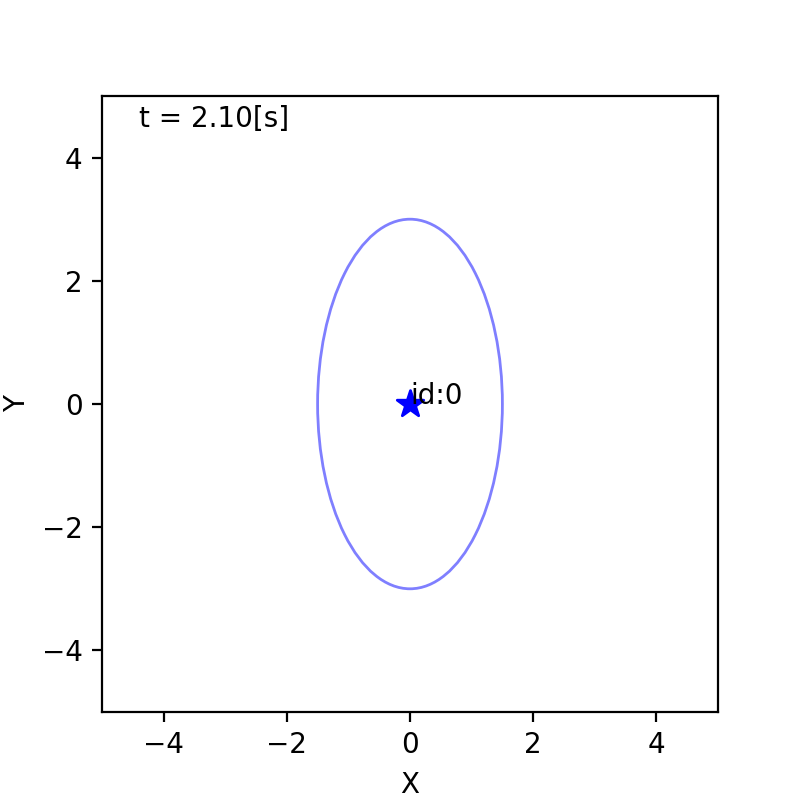

In [3]:
if __name__ == '__main__': 
    time_interval = 0.1
    world = World(30, time_interval) 

    m = Map()
    m.append_landmark(EstimatedLandmark())
    m.landmarks[0].cov = np.array([[1,0], [0,2]])
    world.append(m)

    world.draw()